In [1]:

from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import platform
import traceback
import xarray
import xbout
import scipy
import re

onedrive_path = onedrive_path = str(os.getcwd()).split("OneDrive")[0] + "OneDrive"
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\sdtools"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\soledge"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages"))

from hermes3.utils import *
# from gridtools.hypnotoad_tools import *
from gridtools.b2_tools import *
from gridtools.utils import *

from hermes3.fluxes import *
from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *

from code_comparison.code_comparison import *
from code_comparison.viewer_2d import *


%load_ext autoreload
%autoreload 2


print("Done")


st40_phys_viewer can not be loaded from outside Tokamak Energy!

Gridtools not found
Done


In [2]:
casestore = dict()

In [3]:
db = CaseDB(
    case_dir = os.path.join(onedrive_path, r"Project\collab\tech\cases\st40"),
    grid_dir = os.path.join(onedrive_path, r"Project\collab\tech\grid")
)

toload = [
    # dict(name="base", id="d11c-d10d_3e19", grid="g3b2-fatter_newhypno.nc", unnormalise_geom = True),
    dict(name="base", id="d11d-d11b-3e19_try2", grid="g3b2-fatter_newhypno.nc", unnormalise_geom = True),
    # dict(name="base", id="d13a-d11b_decaylength", grid="g3b2-fatter_newhypno.nc", unnormalise_geom = True),
    # dict(name="base", id="d12a-2e19_free_sol", grid="g3b2-fatter_newhypno.nc", unnormalise_geom = True),
    # dict(name="base", id="d14a-d13a_edge_recycling", grid="g3b2-fatter_newhypno.nc", unnormalise_geom = True),
    # dict(name="base", id="d14b-edgerec_no_Tnfix", grid="g3b2-fatter_newhypno.nc", unnormalise_geom = True),
]

for case in toload:
    casestore[case["name"]] = Load.case_2D(db.casepaths[case["id"]], gridfilepath = db.gridpaths[case["grid"]],
                                           double_load = False, keep_xboundaries = True, keep_yboundaries = True,
                                           unnormalise_geom = case["unnormalise_geom"])

CHECK: Total domain volume is 1.942E+00 [m3]


In [4]:
plt.close("all")
%matplotlib inline

base


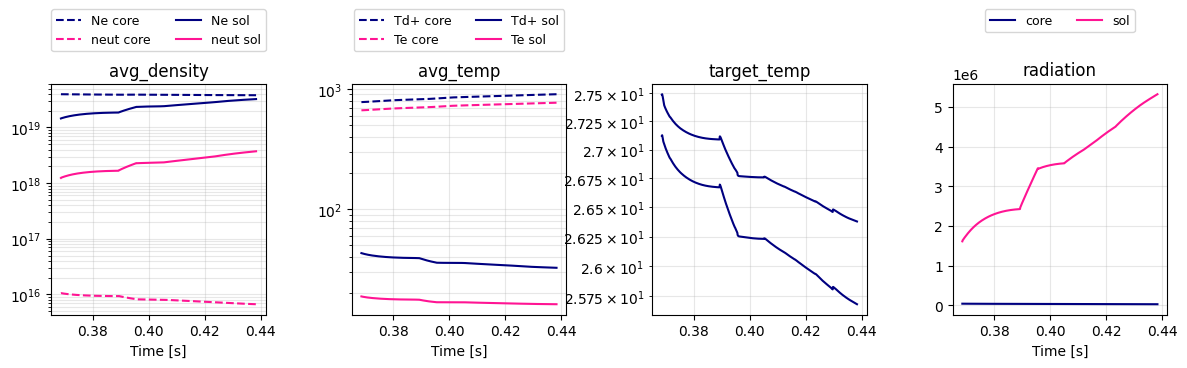

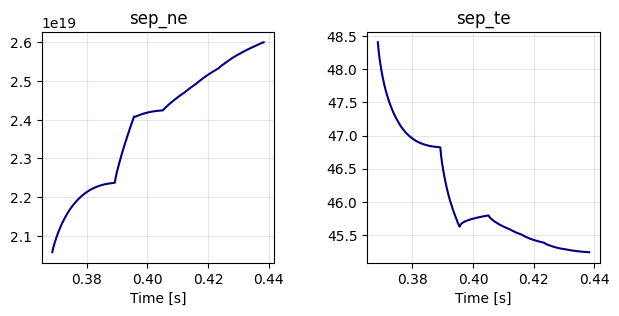

In [5]:
for casename in casestore.keys():
    print(casename)
    Monitor(casestore[casename], [["avg_density", "avg_temp", "target_temp","radiation"], ["sep_ne", "sep_te"]])

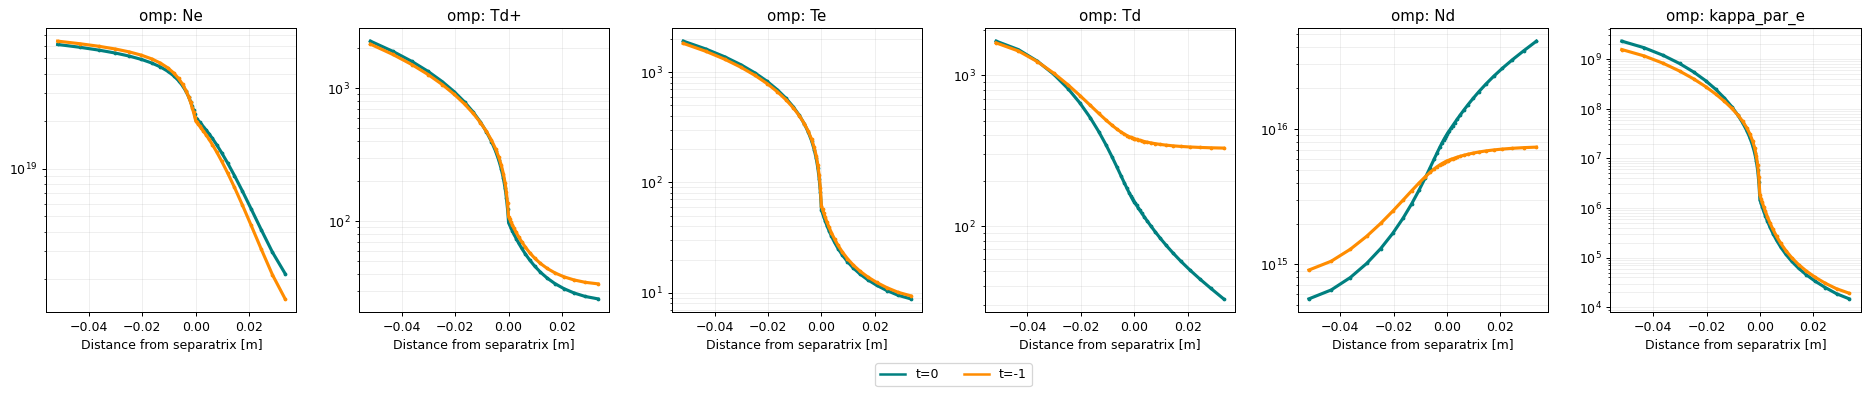

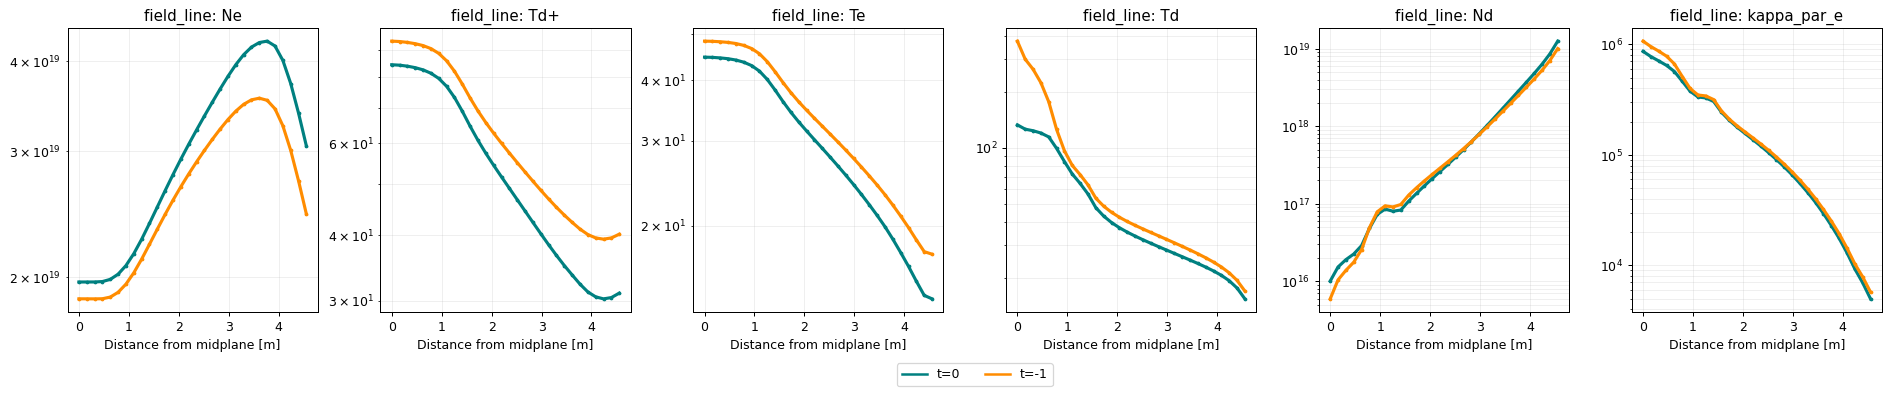

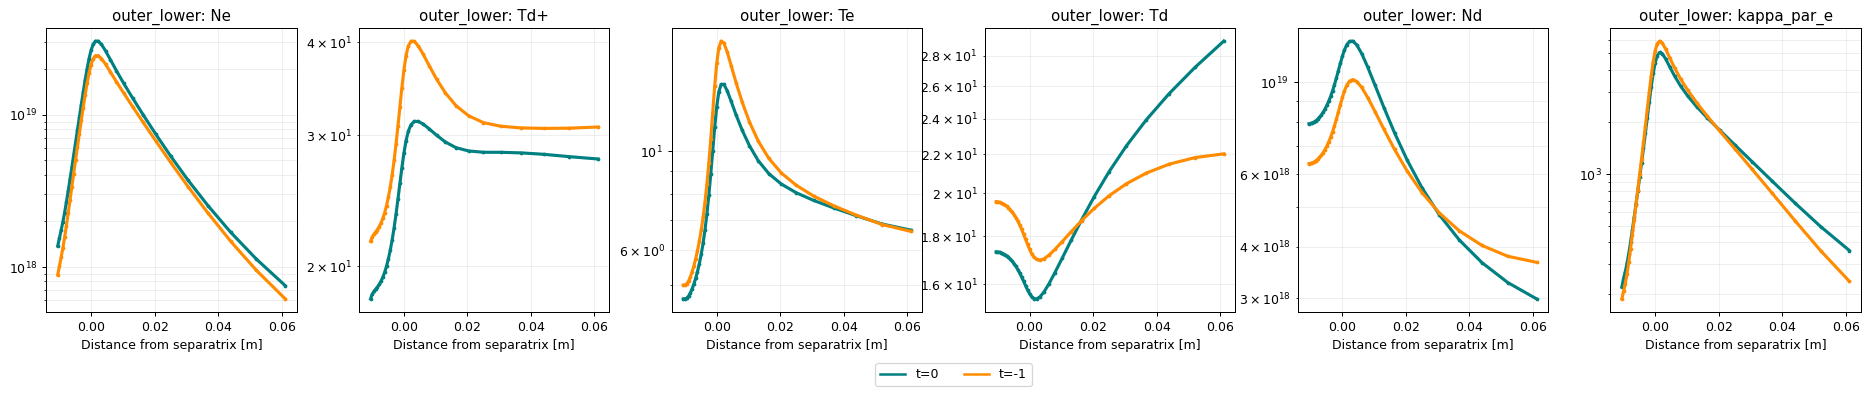

In [6]:
cases = dict()

cases["t=0"] = casestore["base"].ds.isel(t=0, x = slice(2,-2))
cases["t=-1"] = casestore["base"].ds.isel(t=-1, x = slice(2,-2))

lineplot(
    cases = cases,
    clean_guards = False,
    regions = ["omp", "field_line", "outer_lower"],
    params = ["Ne", "Td+", "Te", "Td", "Nd", "kappa_par_e"],
    # params = ["Pd+", "Pe", "Pd", "NVd+", "NVd"],
    dpi = 90
)

In [21]:
%matplotlib widget

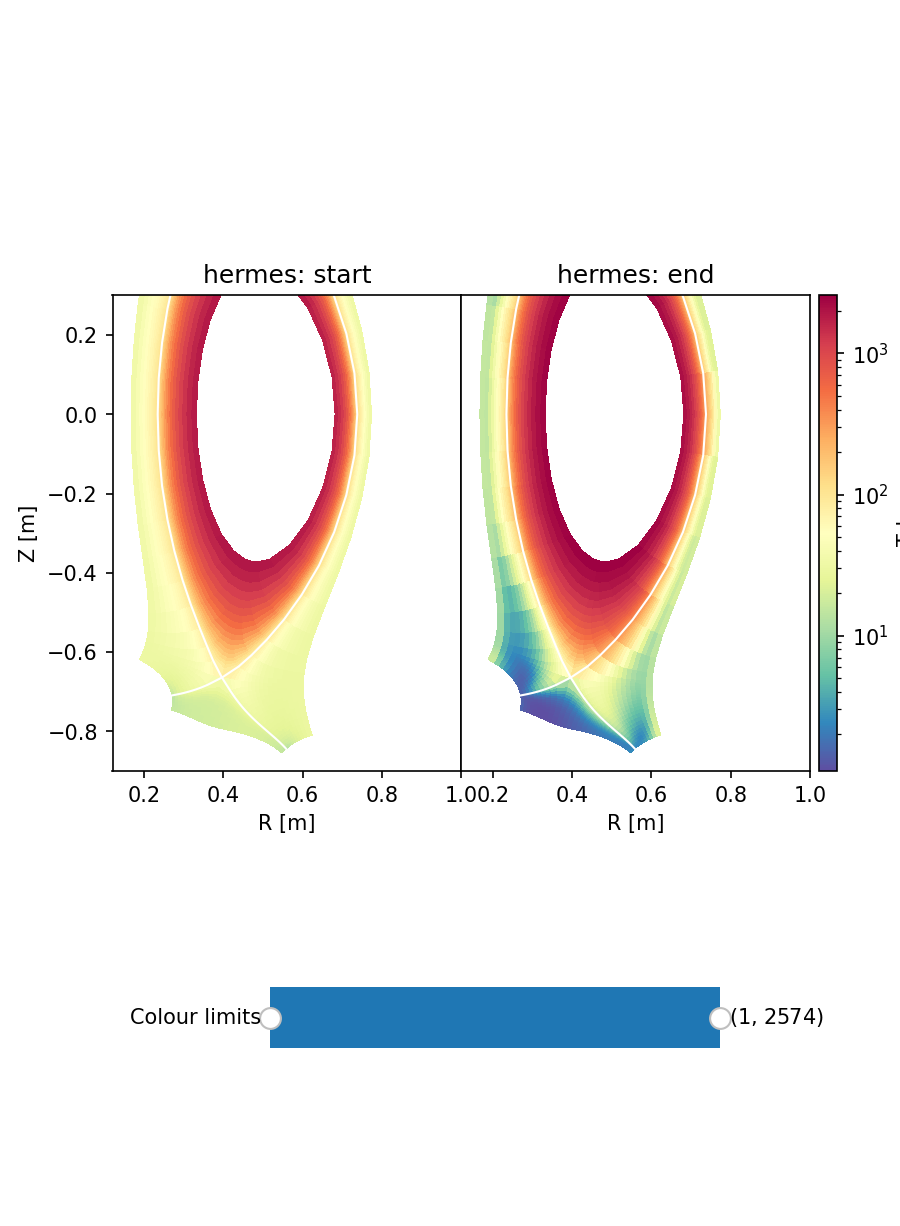

(1.1006931165340779, 2419.015517498714)
(1.1006931165340779, 2384.707700883758)
(1.1006931165340779, 2413.297548062888)
(1.1006931165340779, 2356.117853704628)
(1.1006931165340779, 2327.5280065254983)
(1.1006931165340779, 2316.0920676538462)
(1.1006931165340779, 2304.656128782194)
(1.1006931165340779, 2287.502220474716)
(1.1006931165340779, 2276.0662816030645)
(1.1006931165340779, 2281.7842510388905)
(1.1006931165340779, 2270.3483121672384)
(1.1006931165340779, 2258.9123732955863)
(1.1006931165340779, 2253.1944038597603)
(1.1006931165340779, 2247.4764344239343)
(1.1006931165340779, 2241.7584649881082)
(1.1006931165340779, 2218.8865872448046)
(1.1006931165340779, 2201.7326789373265)
(1.1006931165340779, 2104.5271985282848)
(1.1006931165340779, 2150.2709540148926)
(1.1006931165340779, 2053.065473605851)
(1.1006931165340779, 1927.270146017679)
(1.1006931165340779, 1944.4240543251572)
(1.1006931165340779, 1915.834207146027)
(1.1006931165340779, 1915.834207146027)
(1.1006931165340779, 1852.

In [ ]:
plt.close("all")
self = v = viewer_2d(
    "Td",
    cases = [
        {"name" : "start", "code":"hermes", "ds" : casestore["base"].ds.isel(t=0)},
        {"name" : "end", "code":"hermes", "ds" : casestore["base"].ds.isel(t=-1)},
    ],
    logscale = True,
    # vmin = 10,
    # vmax = 2000,
    # vmin = 1e17,
    # vmax = 5e17,
    dpi = 150,
    ylim = (-0.9,0.3),
    xlim = (0.12, 1.0),
    wspace = 0.0,
    cmap = "Spectral_r"
)